In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

# customize plot
rcParams['figure.dpi'] = 100
rcParams['font.size'] = 14
rcParams['font.family'] = 'StixGeneral'

In [2]:
class Point(): 
    def __init__(self, coord = [], domain = 1.0) -> None:
        if coord: 
            assert len(coord) == 3, "The program works in 3d space."
            self.x = coord[0]
            self.y = coord[1]
            self.z = coord[2]
        # randomly generate coord
        else: 
            self.x = domain * np.random.random()
            self.y = domain * np.random.random() 
            self.z = domain * np.random.random()
    
    # calculate the dist between 2 points
    def distance(self, other):
        return np.sqrt((self.x - other.x)**2 + (self.y - other.y)**2 + (self.z - other.z)**2)

In [3]:
class Particle(Point): 
    # w: weight of the particle
    # u: potential
    def __init__(self, coord=[], domain=1, w = 1.0) -> None:
        Point.__init__(self, coord, domain)
        self.w = w
        self.u = 0

In [8]:
# create particles
n = 50
weight = 1/n
particles = [Particle(w = weight) for i in range(n)]

In [5]:
def direct_sum(particles):
    for i, target in enumerate(particles):
        for source in (particles[ :i] + particles[i+1: ]):
            r = target.distance(source) # distance
            target.u += source.w / r

In [9]:
# run direct_sum
direct_sum(particles)

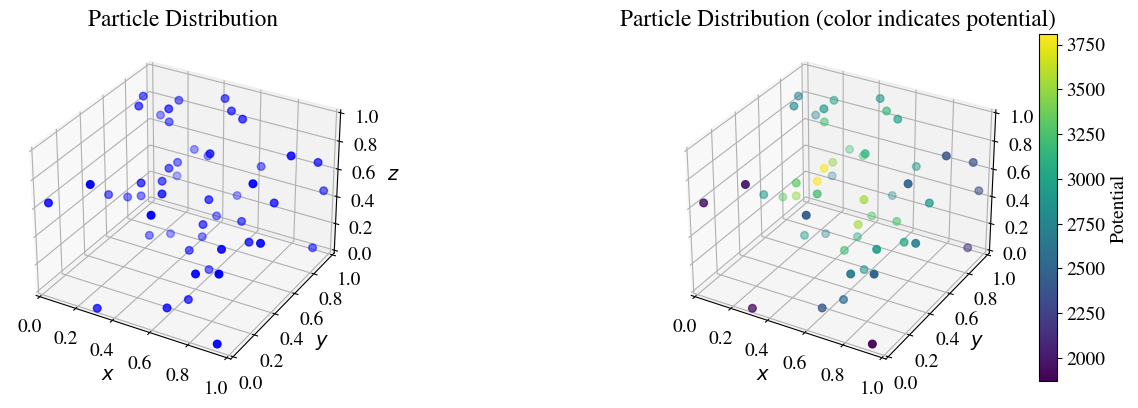

In [32]:
# plot spatial particle distribution
fig = plt.figure(figsize=(18,4.5))
# left plot
ax = fig.add_subplot(1,2,1, projection='3d')
ax.scatter([particle.x for particle in particles], 
           [particle.y for particle in particles], 
           [particle.z for particle in particles], s=30, c='b')
ax.set_xlim3d(0,1)
ax.set_ylim3d(0,1)
ax.set_zlim3d(0,1)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$z$')
ax.set_title('Particle Distribution')

# right plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
scale = 50  # scale for dot size in scatter plot
u_values = np.array([particle.u for particle in particles])
u_min, u_max = np.min(u_values), np.max(u_values)
color_norm = plt.Normalize(u_min, u_max)  # normalize color values
cmap = plt.cm.get_cmap('viridis')  # choose a colormap

scatter = ax.scatter([particle.x for particle in particles],
                     [particle.y for particle in particles],
                     [particle.z for particle in particles],
                     s=30, c=u_values, cmap=cmap, norm=color_norm)
ax.set_xlim3d(0, 1)
ax.set_ylim3d(0, 1)
ax.set_zlim3d(0, 1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.set_title('Particle Distribution (color indicates potential)')

# Add colorbar legend
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Potential')
cbar.ax.set_position([3, 0.1, 0.03, 0.8])

plt.subplots_adjust(right=0.8)

plt.show()


In [12]:
# evaluate the time cost of direct_sum
%timeit direct_sum(particles)

4.23 ms ± 144 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
